In [1]:
import matplotlib.pyplot as plt
import seaborn           as sns
import pandas            as pd
import numpy             as np

In [2]:
fontsize = 18

colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#8bd3c7"]

In [3]:
df = pd.read_csv("./grid_results_wp.csv")
df

,n_workers,n_threads,n_partitions,load_time,rotation_time,mapping_time,compute_time,total_time
0,1,1,1,7.207897,0.024982,0.001510,37.222512,44.458498
1,2,1,1,6.167674,0.021075,0.002175,35.522791,41.713898
2,3,1,1,6.026695,0.020701,0.008936,34.841228,40.898162
3,4,1,1,5.759393,0.019684,0.000723,35.249270,41.029926
4,5,1,1,5.710862,0.019625,0.008381,35.080341,40.820297
5,6,1,1,6.244052,0.021346,0.002865,35.282551,41.551701
6,7,1,1,5.903683,0.019546,0.001060,37.785186,43.709698
7,8,1,1,5.756617,0.019704,0.000761,34.014591,39.793853
8,1,1,2,5.718728,0.020804,0.000973,18.074773,23.816816
9,2,1,2,5.897371,0.021250,0.001487,19.236992,25.157263


In [4]:
df.describe()

,n_workers,n_threads,n_partitions,load_time,rotation_time,mapping_time,compute_time,total_time
count,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,4.500000,1.0,18.142857,5.903881,0.020069,0.001594,12.429211,18.355212
std,2.312024,0.0,21.428468,0.292531,0.000936,0.001580,10.717850,10.789866
min,1.000000,1.0,1.000000,5.621068,0.018719,0.000541,3.758102,9.415635
25%,2.750000,1.0,2.000000,5.720393,0.019526,0.000816,4.721216,10.791966
50%,4.500000,1.0,8.000000,5.824288,0.019915,0.001180,7.734667,13.568467
75%,6.250000,1.0,32.000000,5.982760,0.020438,0.001570,18.513517,24.319284
max,8.000000,1.0,64.000000,7.207897,0.024982,0.008936,37.785186,44.458498


## Heatmaps

In [5]:
load_time_matrix     = df.pivot("n_workers", "n_partitions", "load_time")
rotation_time_matrix = df.pivot("n_workers", "n_partitions", "rotation_time")
mapping_time_matrix  = df.pivot("n_workers", "n_partitions", "mapping_time")
compute_time_matrix  = df.pivot("n_workers", "n_partitions", "compute_time")
total_time_matrix    = df.pivot("n_workers", "n_partitions", "total_time")

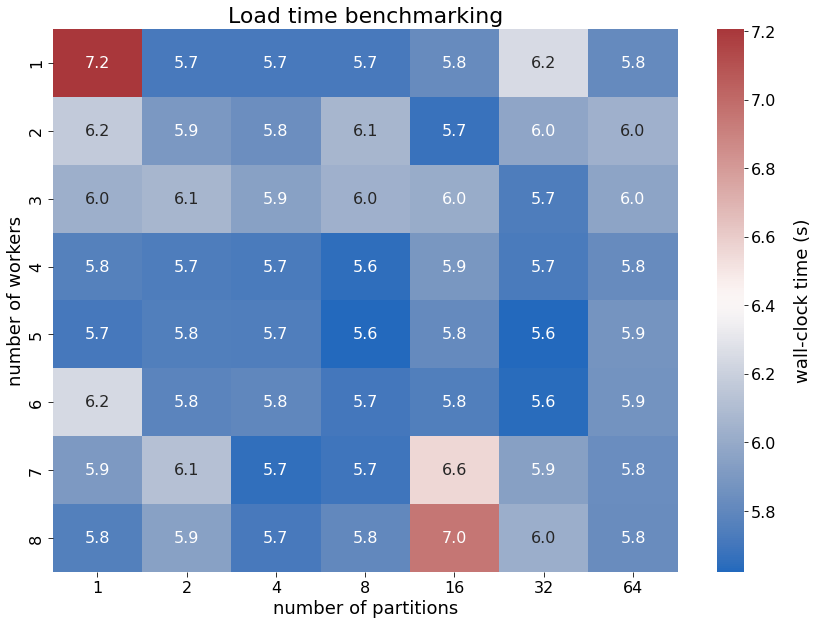

In [33]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(1, 1, 1)

sns.heatmap(
    data      = load_time_matrix, 
    annot     = True, 
    annot_kws = {"fontsize": fontsize - 2},
    fmt       = ".1f",
    cbar      = True,
    cmap      = sns.color_palette("vlag", as_cmap=True),
    ax        = ax,
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = fontsize - 2)
cbar.ax.get_yaxis().labelpad = fontsize
cbar.ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)

ax.set_title("Load time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of partitions", fontsize = fontsize)
ax.set_ylabel("number of workers", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

fig.savefig("plots/heatmaps/load_time_wp.svg", facecolor="white", dpi=300)
plt.show()

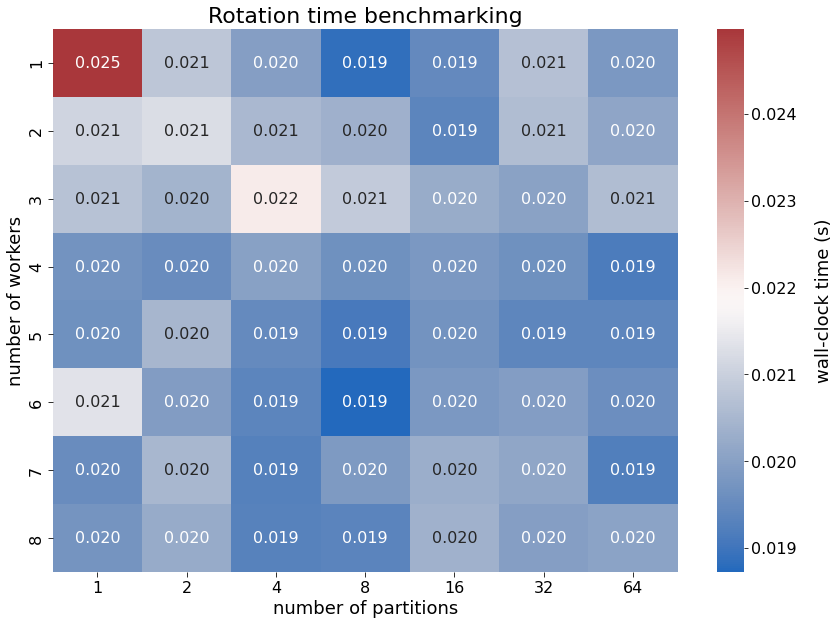

In [34]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(1, 1, 1)

sns.heatmap(
    data      = rotation_time_matrix, 
    annot     = True, 
    annot_kws = {"fontsize": fontsize - 2},
    fmt       = ".3f",
    cbar      = True,
    cmap      = sns.color_palette("vlag", as_cmap=True),
    ax        = ax,
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = fontsize - 2)
cbar.ax.get_yaxis().labelpad = fontsize
cbar.ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)

ax.set_title("Rotation time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of partitions", fontsize = fontsize)
ax.set_ylabel("number of workers", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)


fig.savefig("plots/heatmaps/rotation_time_wp.svg", facecolor="white", dpi=300)
plt.show()

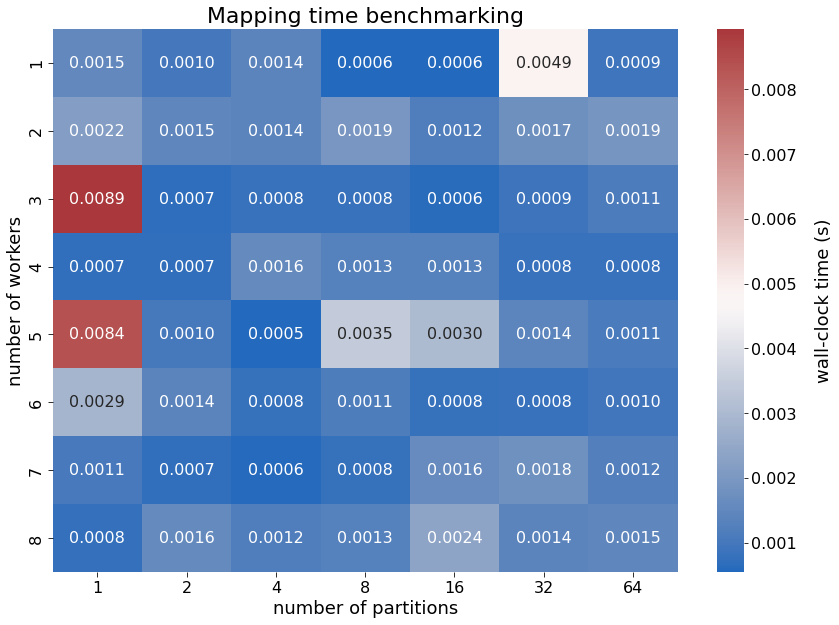

In [35]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(1, 1, 1)

sns.heatmap(
    data      = mapping_time_matrix, 
    annot     = True, 
    annot_kws = {"fontsize": fontsize - 2},
    fmt       = ".4f",
    cbar      = True,
    cmap      = sns.color_palette("vlag", as_cmap=True),
    ax        = ax,
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = fontsize - 2)
cbar.ax.get_yaxis().labelpad = fontsize
cbar.ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)

ax.set_title("Mapping time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of partitions", fontsize = fontsize)
ax.set_ylabel("number of workers", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)


fig.savefig("plots/heatmaps/mapping_time_wp.svg", facecolor="white", dpi=300)
plt.show()

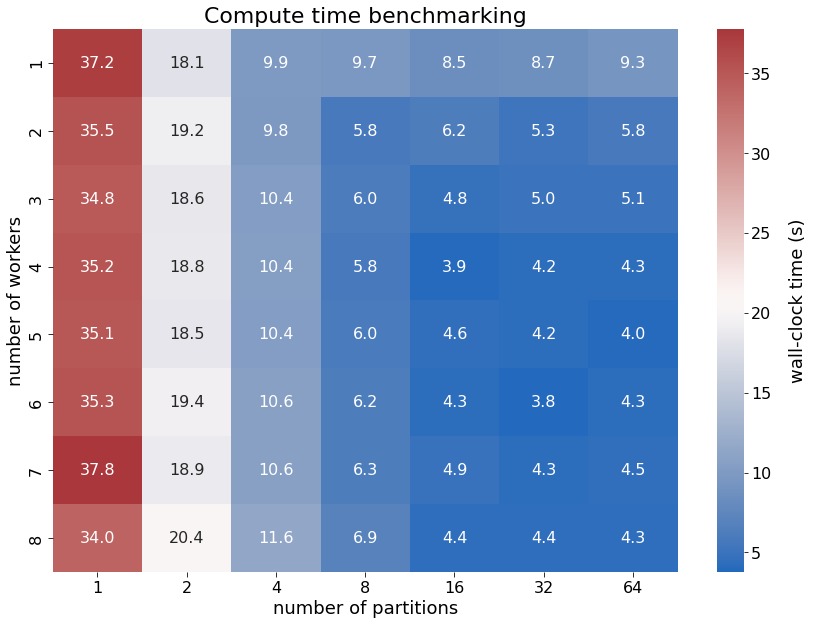

In [36]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(1, 1, 1)

sns.heatmap(
    data      = compute_time_matrix, 
    annot     = True, 
    annot_kws = {"fontsize": fontsize - 2},
    fmt       = ".1f",
    cbar      = True,
    cmap      = sns.color_palette("vlag", as_cmap=True),
    ax        = ax,
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = fontsize - 2)
cbar.ax.get_yaxis().labelpad = fontsize
cbar.ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)

ax.set_title("Compute time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of partitions", fontsize = fontsize)
ax.set_ylabel("number of workers", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)


fig.savefig("plots/heatmaps/compute_time_wp.svg", facecolor="white", dpi=300)
plt.show()

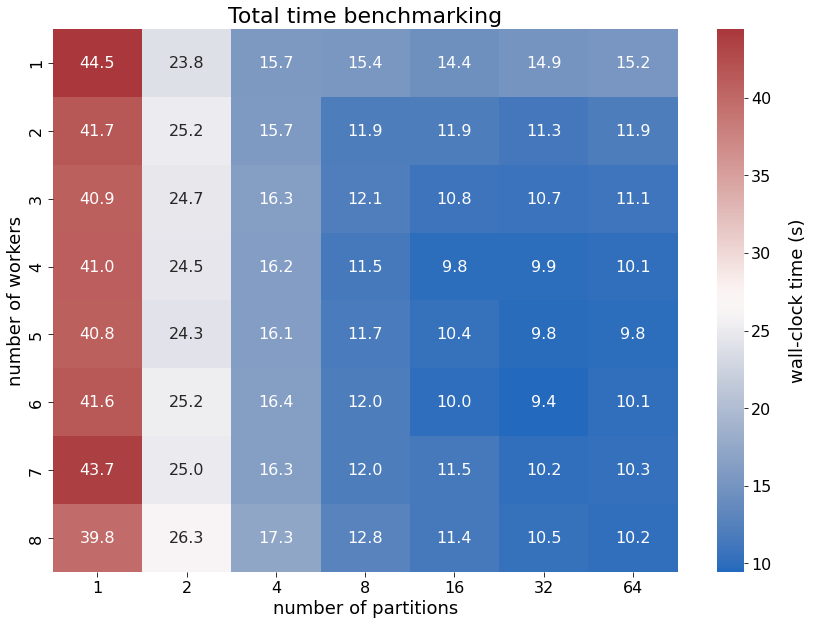

In [37]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(1, 1, 1)

sns.heatmap(
    data      = total_time_matrix, 
    annot     = True, 
    annot_kws = {"fontsize": fontsize - 2},
    fmt       = ".1f",
    cbar      = True,
    cmap      = sns.color_palette("vlag", as_cmap=True),
    ax        = ax,
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = fontsize - 2)
cbar.ax.get_yaxis().labelpad = fontsize
cbar.ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)

ax.set_title("Total time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of partitions", fontsize = fontsize)
ax.set_ylabel("number of workers", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)


fig.savefig("plots/heatmaps/total_time_wp.svg", facecolor="white", dpi=300)
plt.show()

## Trends

### Time vs partitions

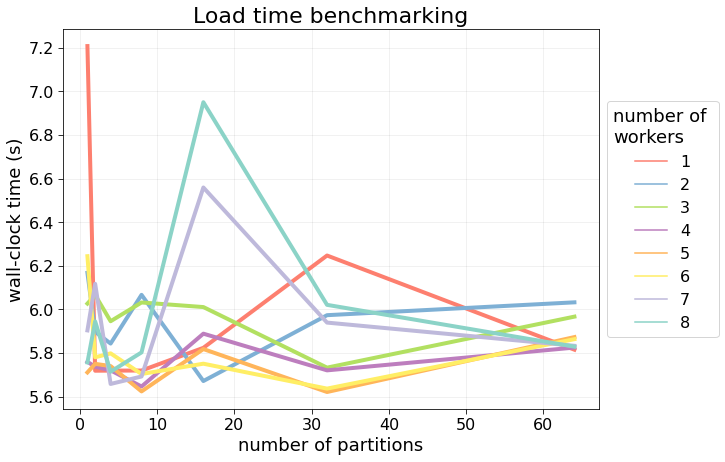

In [38]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_partitions",
    y         = "load_time",
    hue       = "n_workers",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Load time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of partitions", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nworkers",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/load_time_wp_ptrend.svg", facecolor="white", dpi=300)
plt.show()

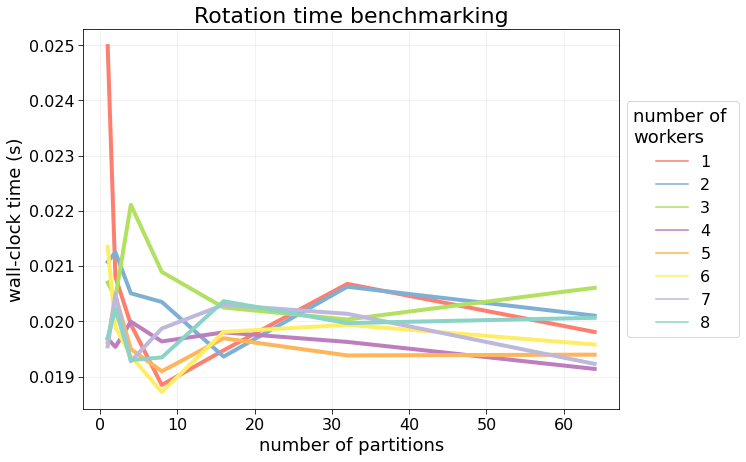

In [39]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_partitions",
    y         = "rotation_time",
    hue       = "n_workers",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Rotation time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of partitions", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nworkers",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/rotation_time_wp_ptrend.svg", facecolor="white", dpi=300)
plt.show()

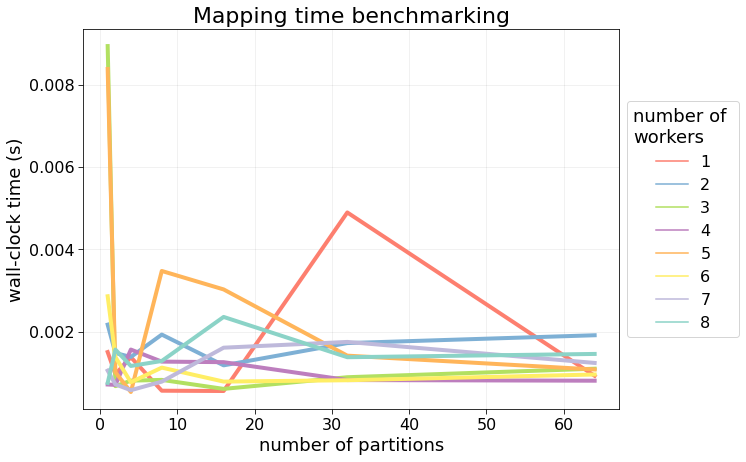

In [40]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_partitions",
    y         = "mapping_time",
    hue       = "n_workers",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Mapping time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of partitions", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nworkers",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/mapping_time_wp_ptrend.svg", facecolor="white", dpi=300)
plt.show()

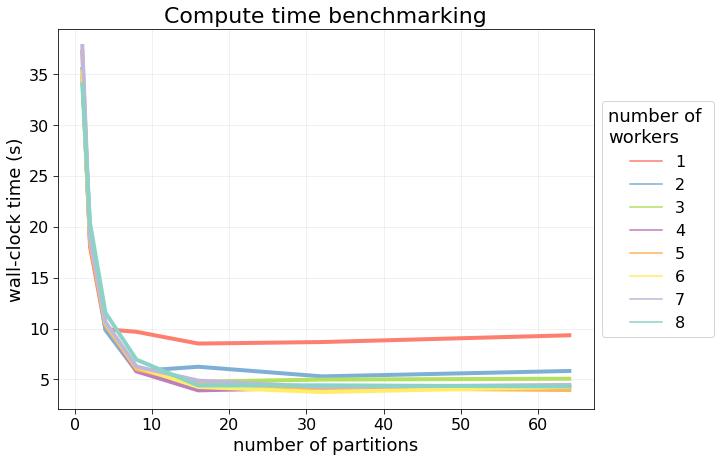

In [41]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_partitions",
    y         = "compute_time",
    hue       = "n_workers",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Compute time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of partitions", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nworkers",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/compute_time_wp_ptrend.svg", facecolor="white", dpi=300)
plt.show()

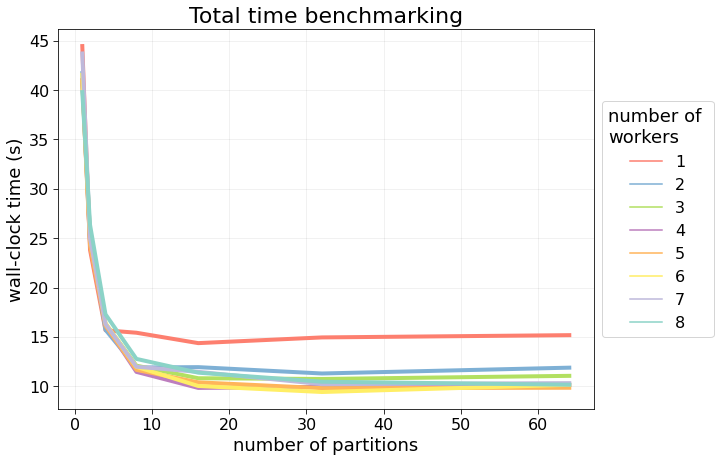

In [42]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_partitions",
    y         = "total_time",
    hue       = "n_workers",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Total time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of partitions", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nworkers",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/total_time_wp_ptrend.svg", facecolor="white", dpi=300)
plt.show()

### Time vs workers

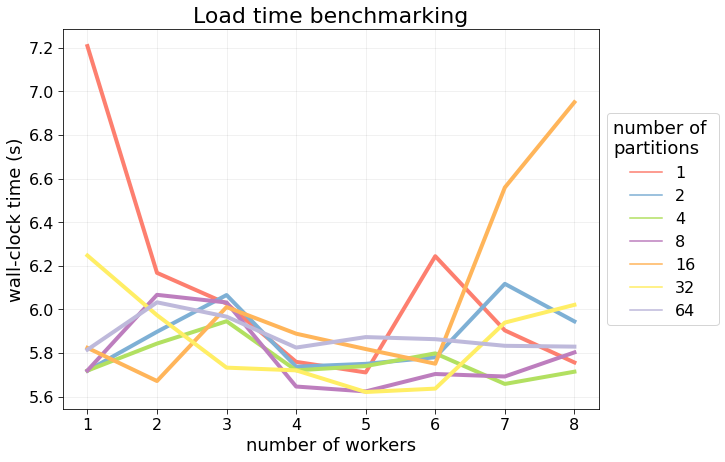

In [48]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_workers",
    y         = "load_time",
    hue       = "n_partitions",
    palette   = colors[:-1],
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Load time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of workers", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \npartitions",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/load_time_wp_wtrend.svg", facecolor="white", dpi=300)
plt.show()

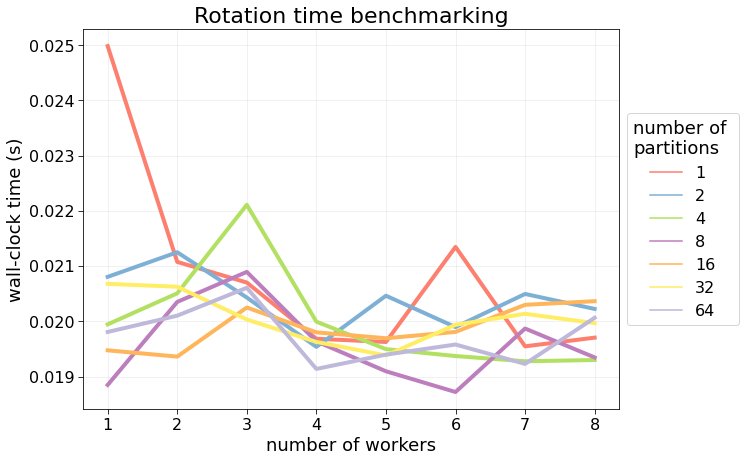

In [49]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_workers",
    y         = "rotation_time",
    hue       = "n_partitions",
    palette   = colors[:-1],
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Rotation time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of workers", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \npartitions",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/rotation_time_wp_wtrend.svg", facecolor="white", dpi=300)
plt.show()

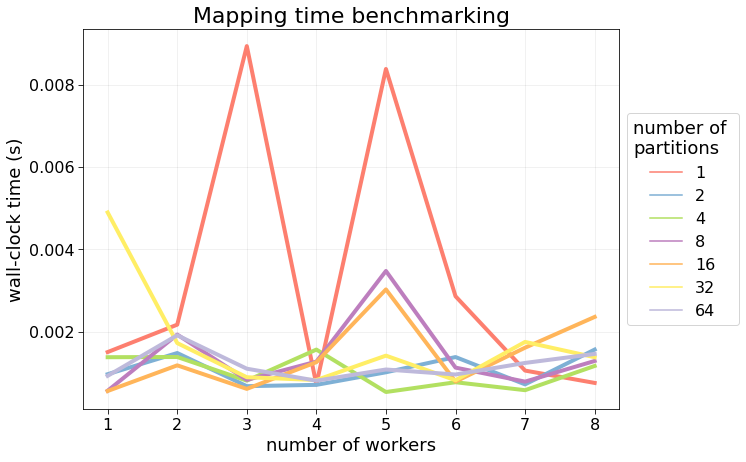

In [50]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_workers",
    y         = "mapping_time",
    hue       = "n_partitions",
    palette   = colors[:-1],
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Mapping time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of workers", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \npartitions",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/mapping_time_wp_wtrend.svg", facecolor="white", dpi=300)
plt.show()

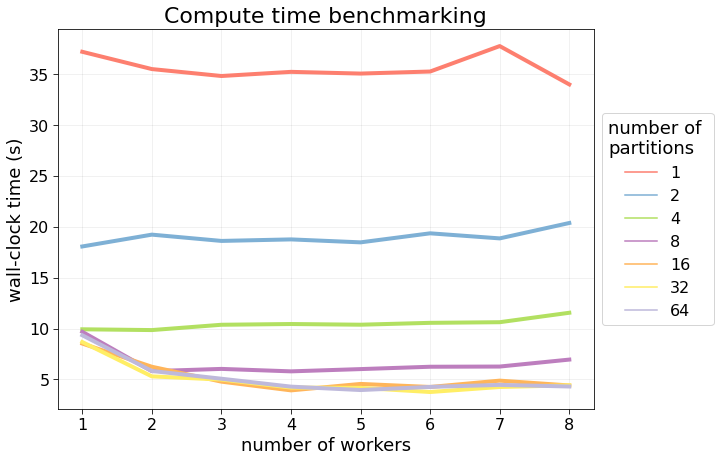

In [51]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_workers",
    y         = "compute_time",
    hue       = "n_partitions",
    palette   = colors[:-1],
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Compute time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of workers", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \npartitions",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/compute_time_wp_wtrend.svg", facecolor="white", dpi=300)
plt.show()

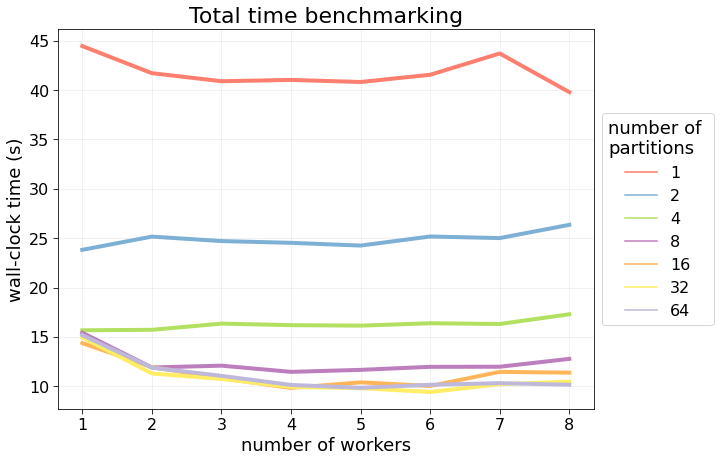

In [52]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_workers",
    y         = "total_time",
    hue       = "n_partitions",
    palette   = colors[:-1],
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Total time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of workers", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \npartitions",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


fig.savefig("plots/trends/total_time_wp_wtrend.svg", facecolor="white", dpi=300)
plt.show()